In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
### Función para revisar la calidad del dataframe

def quality_report(data):

    """This method will do a basic data quality report for a data frame"""
        
    if (type(data) != pd.core.frame.DataFrame):
        raise TypeError("Data must be pandas.core.frame.DataFrame")
    else: 
        columns = list(data.columns.values)
        data_type = pd.DataFrame(data.dtypes, columns=['Data type'])
        missing_data = pd.DataFrame(
        data.isnull().sum(), columns=['missing values'])
        present_data = pd.DataFrame(data.count(), columns=['present values'])
        unique_values = pd.DataFrame(columns=['unique values'])
        minimum_values = pd.DataFrame(columns=['minimum values'])
        max_values = pd.DataFrame(columns=['maximun values'])
        
        for i in columns:
            unique_values.loc[i] = [data[i].nunique()]
            try:
                minimum_values.loc[i] = [data[i].min()]
                max_values.loc[i] = [data[i].max()]
            except:
                pass
        
        DQ_report = data_type.join(missing_data).join(present_data).join(
        unique_values).join(minimum_values).join(max_values)
    
    return DQ_report

In [3]:
## Dataset de ventas

datasetventa = 'VENTAS2.xlsx'
venta = pd.read_excel(datasetventa)
venta.head(4)

,TIPO,PRECIO,MUNICIPIO,COLONIA
0,Departamento,6476224,Guadalajara,LADRON DE GUEVARA
1,Departamento,5390000,Zapopan,CAMINO REAL
2,Departamento,3677233,Guadalajara,JARDINES DEL BOSQUE
3,Departamento,7593583,Guadalajara,PROVIDENCIA


In [4]:
## Reporte de calidad del dataset de venta
quality_report(venta)

,Data type,missing values,present values,unique values,minimum values,maximun values
TIPO,object,0,9601,2,Casa,Departamento
PRECIO,int64,0,9601,2327,255000,89000000
MUNICIPIO,object,0,9601,6,El Salto,Zapopan
COLONIA,object,0,9601,792,18 DE MARZO,ZOTOGRANDE


In [5]:
# Dataset de renta
datasetrenta = 'RENTAS2.xlsx'
renta = pd.read_excel(datasetrenta)
renta.head(4)

,TIPO,PRECIO,MUNICIPIO,COLONIA
0,Departamento,7000,Guadalajara,LAS TORRES
1,Casa,15000,Tlajomulco,BOSQUE REAL DE SANTA ANITA
2,Casa,15000,Tlajomulco,BOSQUE REAL DE SANTA ANITA
3,Departamento,16500,Tlajomulco,LA RIOJA


In [6]:
## Reporte de calidad del dataset de renta
quality_report(renta)

,Data type,missing values,present values,unique values,minimum values,maximun values
TIPO,object,0,1665,2,Casa,Departamento
PRECIO,int64,0,1665,247,1800,100000
MUNICIPIO,object,0,1665,6,El Salto,Zapopan
COLONIA,object,0,1665,312,AGRARIA,ZONA CENTRO


In [7]:
# Estadísticas del dataset de venta

venta.describe()

,PRECIO
count,9.601000e+03
mean,6.368639e+06
std,7.039002e+06
min,2.550000e+05
25%,2.300000e+06
50%,4.207900e+06
75%,7.479980e+06
max,8.900000e+07


In [8]:
# Estadísticas del dataset de renta

renta.describe()

,PRECIO
count,1665.000000
mean,23139.223423
std,13265.576594
min,1800.000000
25%,14800.000000
50%,21000.000000
75%,28000.000000
max,100000.000000


In [9]:
precioZMG = venta['PRECIO']
rentaZMG = renta['PRECIO']

In [10]:
def est(precio):
    MIN = precioZMG.min()
    MAX = precioZMG.max()
    MEAN = precioZMG.mean()
    return MIN,MAX,MEAN
    

In [11]:
est(precioZMG)

(255000, 89000000, 6368638.721487345)

In [12]:
def rent(precio):
    MIN = rentaZMG.min()
    MAX = rentaZMG.max()
    MEAN = rentaZMG.mean()
    return MIN,MAX,MEAN

In [13]:
rent(rentaZMG)

(1800, 100000, 23139.223423423424)

In [14]:
## Creación de datasets por municipio

vzapopan = venta[venta['MUNICIPIO'] == 'Zapopan']
vtonala = venta[venta['MUNICIPIO'] == 'Tonalá']
vgdl = venta[venta['MUNICIPIO'] == 'Guadalajara']
vtla = venta[venta['MUNICIPIO'] == 'Tlajomulco']
vsal = venta[venta['MUNICIPIO'] == 'El Salto']
vtlaque = venta[venta['MUNICIPIO'] == 'Tlaquepaque']

precio_zapopan = vzapopan['PRECIO']
promedio_zapopan = precio_zapopan.mean()
min_zapopan = precio_zapopan.min()
max_zapopan = precio_zapopan.max()

precio_tonala = vtonala['PRECIO']
promedio_tonala = precio_tonala.mean()
min_tonala = precio_tonala.min()
max_tonala = precio_tonala.max()

precio_gdl = vgdl['PRECIO']
promedio_gdl = precio_gdl.mean()
min_gdl = precio_gdl.min()
max_gdl = precio_gdl.max()

precio_tlajo = vtla['PRECIO']
promedio_tla = precio_tlajo.mean()
min_tlajo = precio_tlajo.min()
max_tlajo = precio_tlajo.max()

precio_salto = vsal['PRECIO']
promedio_salto = precio_salto.mean()
min_salto = precio_salto.min()
max_salto = precio_salto.max()

precio_tlaque = vtlaque['PRECIO']
promedio_tlaque = precio_tlaque.mean()
min_tlaque = precio_tlaque.min()
max_tlaque = precio_tlaque.max()


stats_venta = pd.DataFrame({'Municipio':('Zapopan', 'Tonala','GDL', 'Tlajomulco', 'El salto', 'Tlaquepaque'),
                     'Promedio': (promedio_zapopan, promedio_tonala,promedio_gdl, promedio_tla, promedio_salto, promedio_tlaque),
                     'min':(min_zapopan,min_tonala, min_gdl, min_tlajo, min_salto,min_tlaque),
                     'max': (max_zapopan,max_tonala, max_gdl, max_tlajo, max_salto,max_tlaque)})
stats_venta



                      

,Municipio,Promedio,min,max
0,Zapopan,7.644576e+06,380282,89000000
1,Tonala,1.632220e+06,295000,14500000
2,GDL,5.617113e+06,255000,82000000
3,Tlajomulco,4.927961e+06,280000,48000000
4,El salto,3.037506e+06,293000,13000000
5,Tlaquepaque,2.140382e+06,320000,35000000


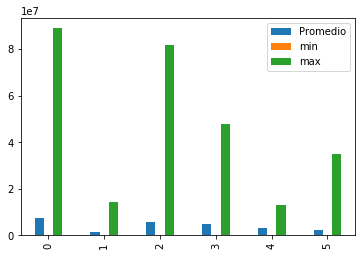

In [15]:
## Plot de comparación entre municipios

stats_venta.plot.bar()

In [16]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

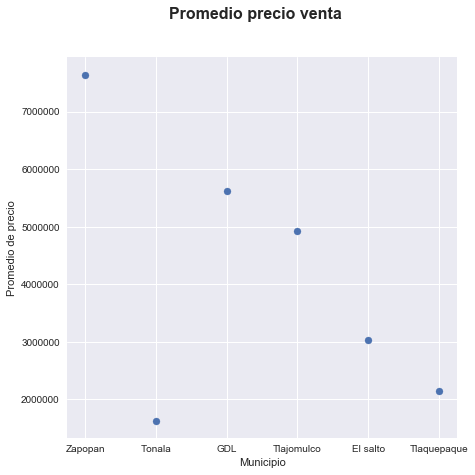

In [17]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize = (7,7))
promedio = ax.scatter(x=stats_venta['Municipio'],
                     y = stats_venta['Promedio'],)


ax.set(xlabel='Municipio',
      ylabel = 'Promedio de precio')
fig.suptitle('Promedio precio venta', fontsize=16, fontweight='bold');

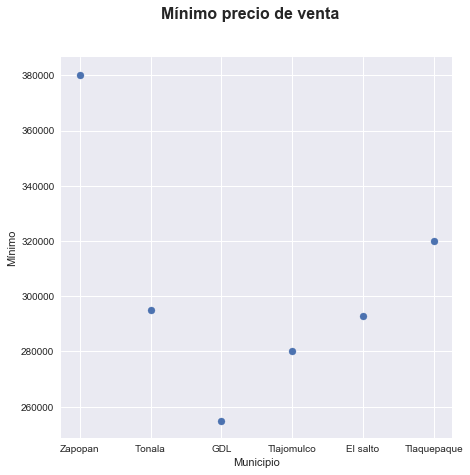

In [18]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize = (7,7))
minimo = ax.scatter(x=stats_venta['Municipio'],
                     y = stats_venta['min'],)


ax.set(xlabel='Municipio',
      ylabel = 'Mínimo')
fig.suptitle('Mínimo precio de venta', fontsize=16, fontweight='bold');

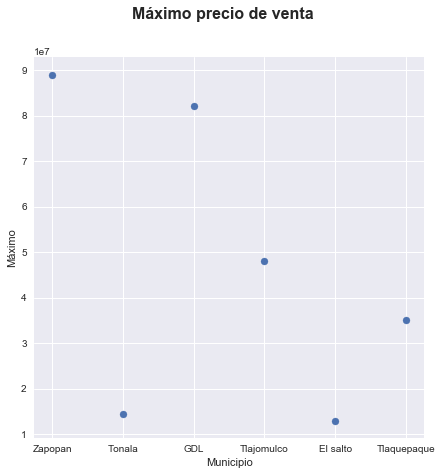

In [19]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize = (7,7))
minimo = ax.scatter(x=stats_venta['Municipio'],
                     y = stats_venta['max'],)


ax.set(xlabel='Municipio',
      ylabel = 'Máximo')
fig.suptitle('Máximo precio de venta', fontsize=16, fontweight='bold');

In [20]:
## Creación de datasets de renta por municipio 

rzapopan = renta[renta['MUNICIPIO'] == 'Zapopan']
rtonala = renta[renta['MUNICIPIO'] == 'Tonalá']
rgdl = renta[renta['MUNICIPIO'] == 'Guadalajara']
rtla = renta[renta['MUNICIPIO'] == 'Tlajomulco']
rsal = renta[renta['MUNICIPIO'] == 'El Salto']
rtlaque = renta[renta['MUNICIPIO'] == 'Tlaquepaque']

precio_zapopan_renta = rzapopan['PRECIO']
promedio_zapopan_renta = precio_zapopan_renta.mean()
min_zapopan_renta = precio_zapopan_renta.min()
max_zapopan_renta = precio_zapopan_renta.max()

precio_tonala_renta = rtonala['PRECIO']
promedio_tonala_renta = precio_tonala_renta.mean()
min_tonala_renta = precio_tonala_renta.min()
max_tonala_renta = precio_tonala_renta.max()

precio_gdl_renta = rgdl['PRECIO']
promedio_gdl_renta = precio_gdl_renta.mean()
min_gdl_renta = precio_gdl_renta.min()
max_gdl_renta = precio_gdl_renta.max()

precio_tlajo_renta = rtla['PRECIO']
promedio_tla_renta = precio_tlajo_renta.mean()
min_tlajo_renta = precio_tlajo_renta.min()
max_tlajo_renta = precio_tlajo_renta.max()

precio_salto_renta = rsal['PRECIO']
promedio_salto_renta = precio_salto_renta.mean()
min_salto_renta = precio_salto_renta.min()
max_salto_renta = precio_salto_renta.max()

precio_tlaque_renta = rtlaque['PRECIO']
promedio_tlaque_renta = precio_tlaque_renta.mean()
min_tlaque_renta = precio_tlaque_renta.min()
max_tlaque_renta = precio_tlaque_renta.max()


stats_renta = pd.DataFrame({'Municipio':('Zapopan', 'Tonala','GDL', 'Tlajomulco', 'El Salto', 'Tlaquepaque'),
                     'Promedio': (promedio_zapopan_renta, promedio_tonala_renta,promedio_gdl_renta, promedio_tla_renta, promedio_salto_renta, promedio_tlaque_renta),
                     'min':(min_zapopan_renta,min_tonala_renta, min_gdl_renta, min_tlajo_renta, min_salto_renta,min_tlaque_renta),
                     'max': (max_zapopan_renta,max_tonala_renta, max_gdl_renta, max_tlajo_renta, max_salto_renta,max_tlaque_renta)})
stats_renta

,Municipio,Promedio,min,max
0,Zapopan,25197.321471,2000,100000
1,Tonala,11900.000000,1800,35000
2,GDL,24351.000000,3000,80000
3,Tlajomulco,15034.254144,2000,50000
4,El Salto,5166.666667,2300,6600
5,Tlaquepaque,10749.264706,3000,30000


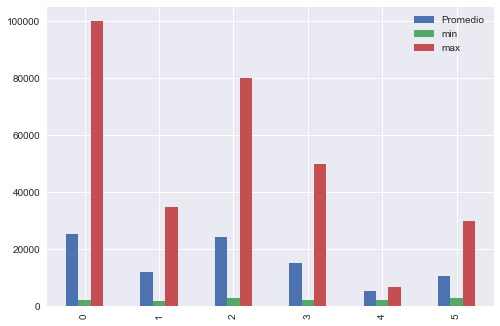

In [21]:
## Plot de comparación de municipio (Renta)
stats_renta.plot.bar()

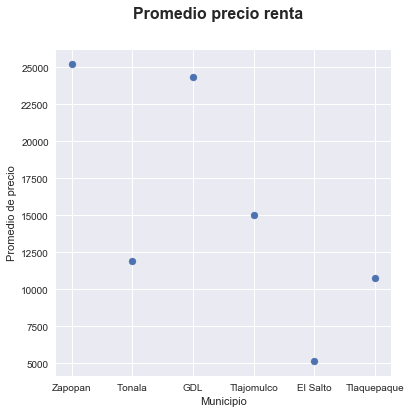

In [22]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize = (6,6))
promedio = ax.scatter(x=stats_renta['Municipio'],
                     y = stats_renta['Promedio'],)


ax.set(xlabel='Municipio',
      ylabel = 'Promedio de precio')
fig.suptitle('Promedio precio renta', fontsize=16, fontweight='bold');


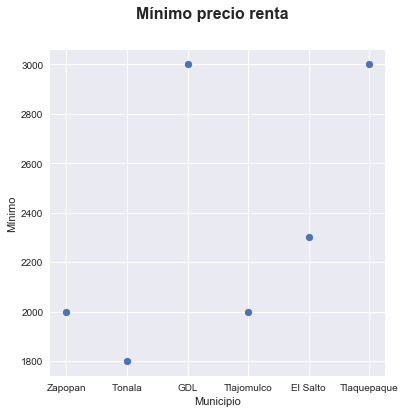

In [23]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize = (6,6))
promedio = ax.scatter(x=stats_renta['Municipio'],
                     y = stats_renta['min'],)


ax.set(xlabel='Municipio',
      ylabel = 'Mínimo')
fig.suptitle('Mínimo precio renta', fontsize=16, fontweight='bold');


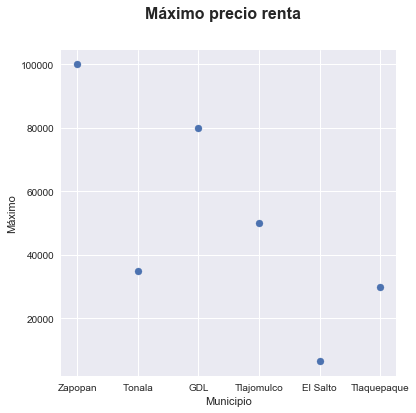

In [24]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize = (6,6))
promedio = ax.scatter(x=stats_renta['Municipio'],
                     y = stats_renta['max'],)


ax.set(xlabel='Municipio',
      ylabel = 'Máximo')
fig.suptitle('Máximo precio renta', fontsize=16, fontweight='bold');


Text(0.5, 1.0, 'Precio de renta por Municipio')

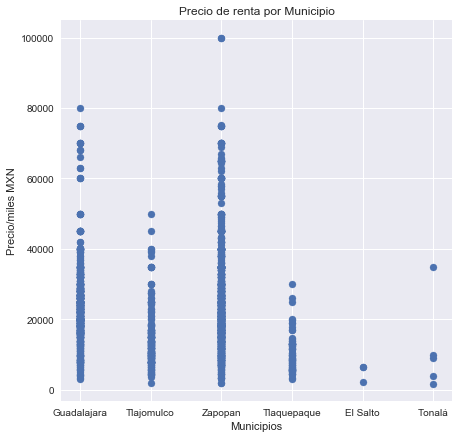

In [25]:


plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(renta['MUNICIPIO'], renta['PRECIO'])
ax.set_xlabel('Municipios')
ax.set_ylabel('Precio/miles MXN')
plt.title('Precio de renta por Municipio')

Text(0.5, 1.0, 'Precio de venta por Municipio')

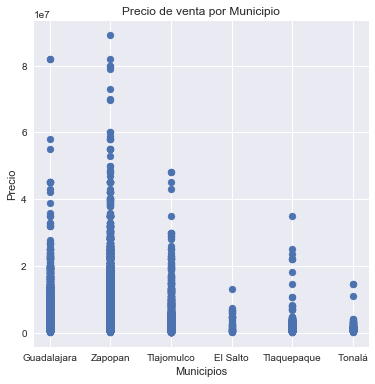

In [26]:


plt.rcParams["figure.figsize"] = (6,6)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(venta['MUNICIPIO'], venta['PRECIO'])
ax.set_xlabel('Municipios')
ax.set_ylabel('Precio')
plt.title('Precio de venta por Municipio')

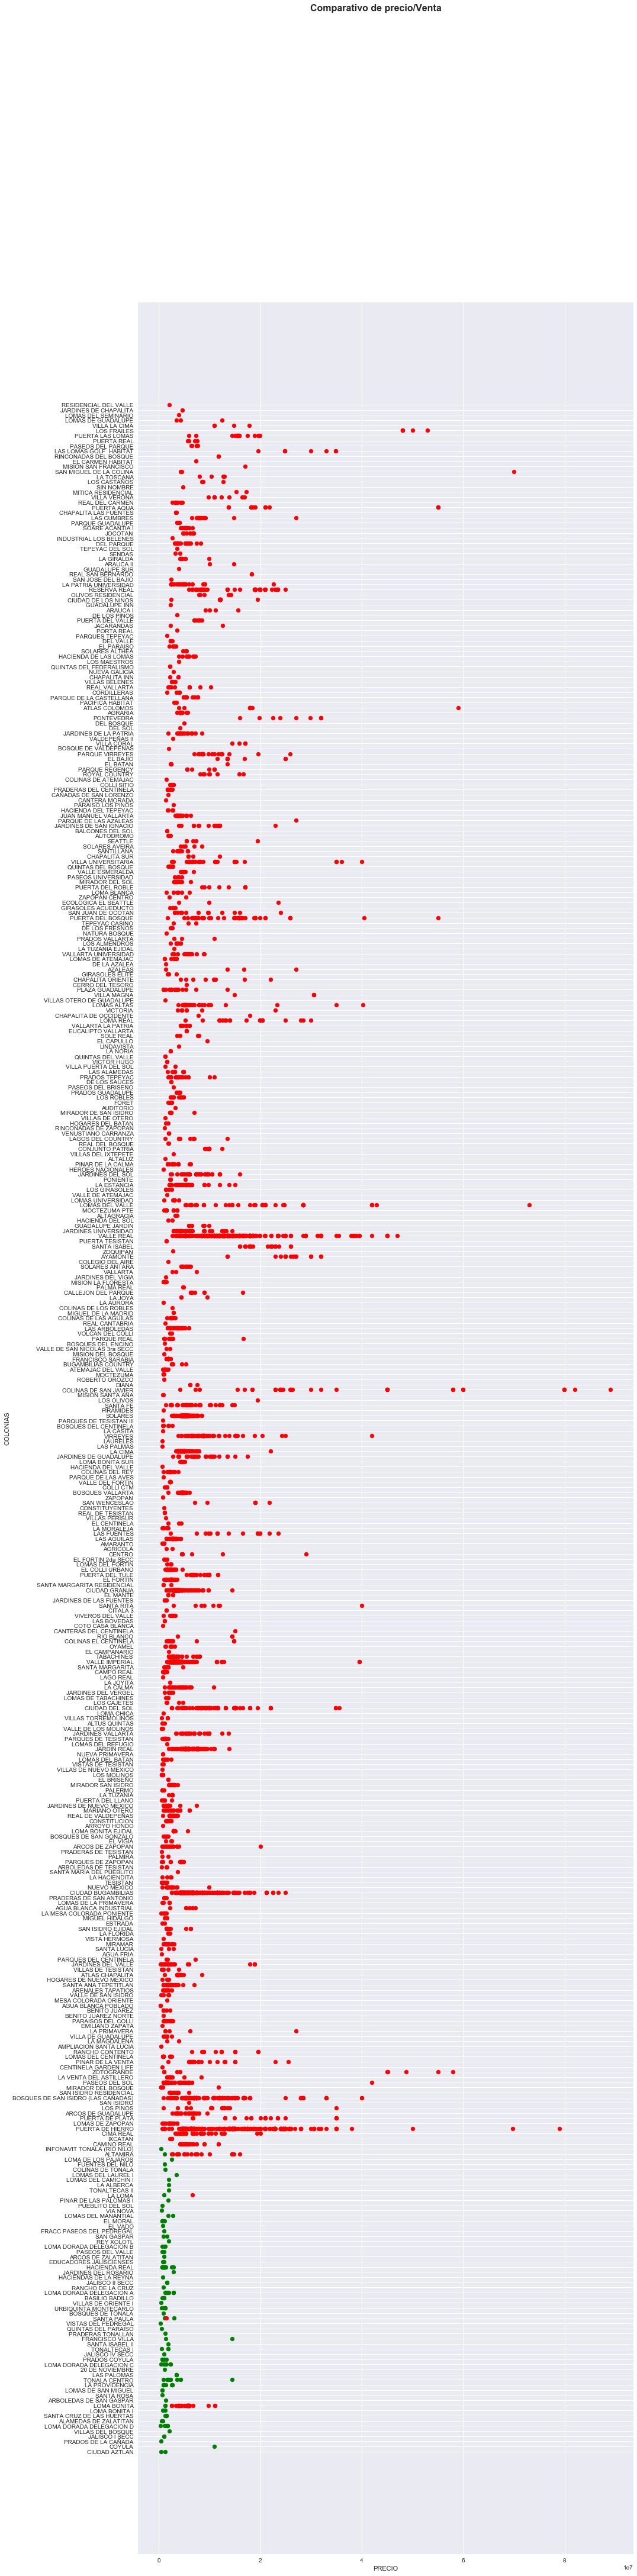

In [27]:
## Comparativo entre municipios

plt.rcParams["figure.figsize"] = (15, 70)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(vtonala['PRECIO'], vtonala['COLONIA'], color='g')

scatter_plot = ax.scatter(vzapopan['PRECIO'], vzapopan['COLONIA'], color='r')

ax.set_xlabel('PRECIO')
ax.set_ylabel('COLONIAS')
fig.suptitle('Comparativo de precio/Venta ', fontsize=16, fontweight='bold');


Text(0.5, 0.98, 'Comparativo de precio/Renta ')

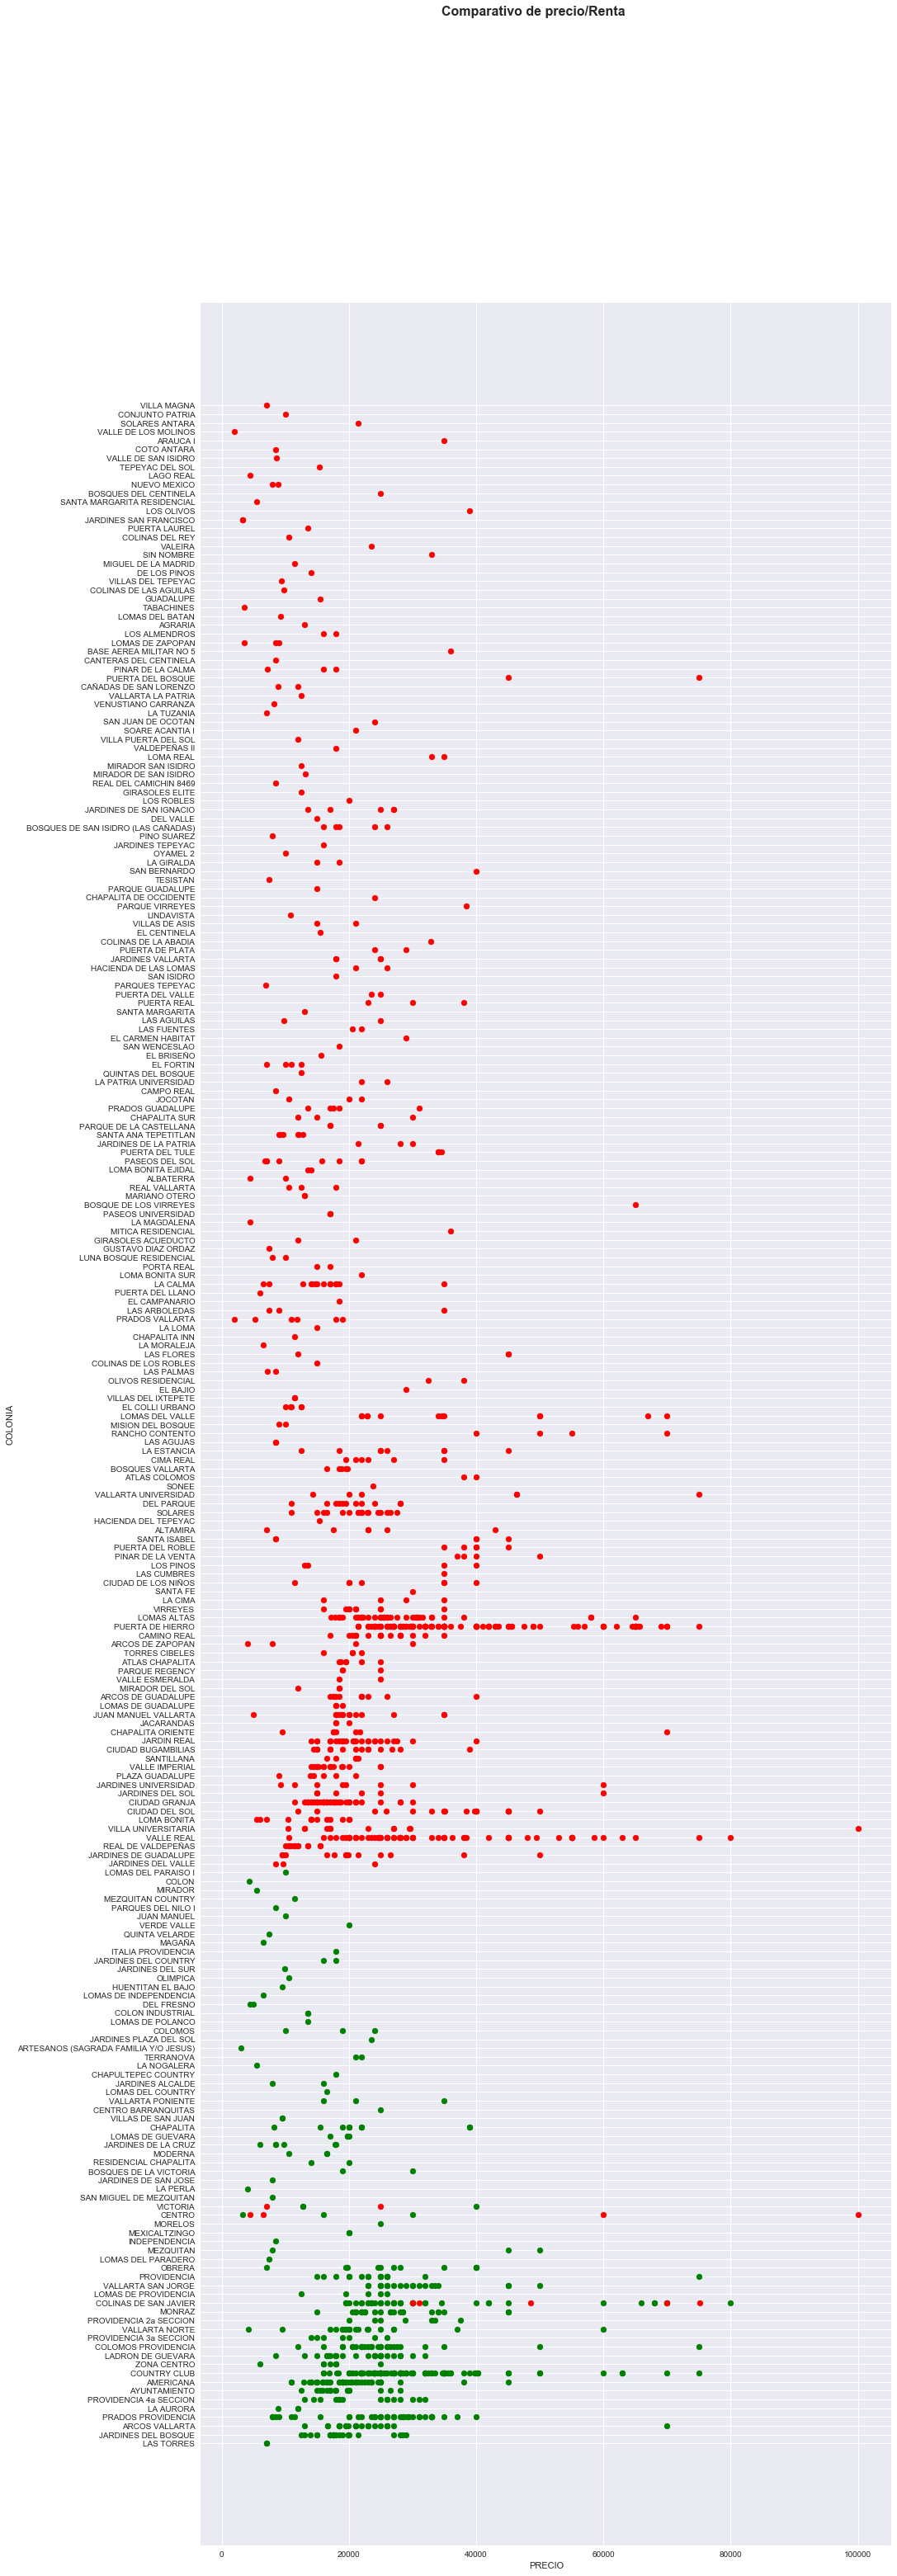

In [28]:
#### Compativo entre municipios

plt.rcParams["figure.figsize"] = (15, 50)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(rgdl['PRECIO'], rgdl['COLONIA'], color='g')

scatter_plot = ax.scatter(rzapopan['PRECIO'], rzapopan['COLONIA'], color='r')

ax.set_xlabel('PRECIO')
ax.set_ylabel('COLONIA')
fig.suptitle('Comparativo de precio/Renta ', fontsize=16, fontweight='bold')


In [29]:
venta

,TIPO,PRECIO,MUNICIPIO,COLONIA
0,Departamento,6476224,Guadalajara,LADRON DE GUEVARA
1,Departamento,5390000,Zapopan,CAMINO REAL
2,Departamento,3677233,Guadalajara,JARDINES DEL BOSQUE
3,Departamento,7593583,Guadalajara,PROVIDENCIA
4,Casa,2500000,Zapopan,IXCATAN
...,...,...,...,...
9596,Departamento,998000,Guadalajara,ZONA CENTRO
9597,Casa,24990000,Tlajomulco,CONDOMINIO CAMPO DE GOLF SANTA ANITA
9598,Casa,14500000,Zapopan,LOMAS DEL VALLE
9599,Departamento,7600000,Guadalajara,VALLARTA SAN JORGE


In [31]:
## CONVERTIR dataframe en arrays


X = venta.drop('PRECIO', axis = 1)
y = venta['PRECIO']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['TIPO', 'MUNICIPIO', 'COLONIA']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<9601x800 sparse matrix of type '<class 'numpy.float64'>'
	with 28803 stored elements in Compressed Sparse Row format>

In [32]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 367)\t1.0"
1,"(0, 1)\t1.0\n (0, 7)\t1.0\n (0, 92)\t1.0"
2,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 308)\t1.0"
3,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 582)\t1.0"
4,"(0, 0)\t1.0\n (0, 7)\t1.0\n (0, 282)\t1.0"
...,...
9596,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 797)\t1.0"
9597,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 142)\t1.0"
9598,"(0, 0)\t1.0\n (0, 7)\t1.0\n (0, 440)\t1.0"
9599,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 732)\t1.0"


In [33]:
dummies = pd.get_dummies(venta[['TIPO', 'MUNICIPIO', 'COLONIA']])
dummies

,TIPO_Casa,TIPO_Departamento,MUNICIPIO_El Salto,MUNICIPIO_Guadalajara,MUNICIPIO_Tlajomulco,MUNICIPIO_Tlaquepaque,MUNICIPIO_Tonalá,MUNICIPIO_Zapopan,COLONIA_18 DE MARZO,COLONIA_20 DE NOVIEMBRE,...,COLONIA_VISTAS DEL PEDREGAL,COLONIA_VISTAS DEL VALLE (VILLAS DE SAN SEBASTIAN),COLONIA_VIVEROS DEL VALLE,COLONIA_VOLCAN DEL COLLI,COLONIA_ZAPOPAN,COLONIA_ZAPOPAN CENTRO,COLONIA_ZAPOTE DEL VALLE,COLONIA_ZONA CENTRO,COLONIA_ZOQUIPAN,COLONIA_ZOTOGRANDE
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9596,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9597,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9598,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9599,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
np.random.seed(42)
X_train, X_test, y_train,y_test = train_test_split(transformed_X,
                                                  y,
                                                  test_size=.2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
model.score(X_test, y_test)

0.6068911358447828